In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import hvplot.pandas
from scipy.stats import linregress
from bokeh.resources import INLINE


In [2]:
formatted_landfall_df = pd.read_csv("Resources/formatted_landfall.csv")
formatted_landfall_df.head()

,# in Season,Year,Latitude,Longitude,Max Winds (kt),Category at Landfall,Central Prssure (mb),Storm Name,Month,County,State
0,3,1983,29.1,-95.1,100,3,962,Alicia,8,Galveston,TX
1,10,1984,33.9,-78.0,95,2,979,Diana,9,Brunswick,NC
2,2,1985,32.2,-80.5,65,1,1003,Bob,7,NaN,NaN
3,4,1985,29.6,-92.7,80,1,987,Danny,8,Cameron,LA
4,5,1985,30.4,-89.2,100,3,959,Elena,9,Harrison,MS


In [3]:
landfall_bea_hpi_df = pd.read_csv('Output_CSVs/landfall_bea_hpi_data.csv')
landfall_bea_hpi_df.head()

,# in Season,Year,Latitude,Longitude,Max Winds (kt),Category at Landfall,Central Prssure (mb),Storm Name,Month,County,...,National Jobs AC Mean,National Jobs AC Mean -1,National Jobs AC Mean +1,National Jobs AC Mean +2,National Jobs AC Mean +3,State Jobs AC Mean,State Jobs AC Mean -1,State Jobs AC Mean +1,State Jobs AC Mean +2,State Jobs AC Mean +3
0,3,1983,29.1,-95.1,100,3,962,Alicia,8,Galveston,...,1.696220,-0.126481,4.441057,2.850772,1.878807,0.073241,2.426554,4.555847,4.271439,-1.943088
1,5,1985,30.4,-89.2,100,3,959,Elena,9,Harrison,...,2.850772,4.441057,1.878807,3.008315,3.041203,4.169243,5.597101,3.582680,2.653948,2.664073
2,9,1985,40.6,-73.3,75,1,961,Gloria,9,Suffolk,...,2.850772,4.441057,1.878807,3.008315,3.041203,3.153399,3.953716,2.840822,0.941134,3.198602
3,13,1985,30.0,-85.4,85,2,967,Kate,11,Bay,...,2.850772,4.441057,1.878807,3.008315,3.041203,6.453085,7.614235,6.030848,2.122551,5.633299
4,2,1986,29.5,-94.2,75,1,990,Bonnie,6,Jefferson,...,1.878807,2.850772,3.008315,3.041203,2.365933,-1.943088,4.271439,3.263058,1.286409,0.310697


In [4]:
costliness_bea_hpi_df = pd.read_csv('Output_CSVs/costliness_bea_hpi_data.csv')
costliness_bea_hpi_df.head()

,# in Season,Year,Latitude,Longitude,Max Winds (kt),Category at Landfall,Central Prssure (mb),Storm Name,Month,County,...,National Jobs AC Mean +1,National Jobs AC Mean +2,National Jobs AC Mean +3,State Jobs AC Mean,State Jobs AC Mean -1,State Jobs AC Mean +1,State Jobs AC Mean +2,State Jobs AC Mean +3,Max Category,Adjusted Costs (Billions)
0,3,1983,29.1,-95.1,100,3,962,Alicia,8,Galveston,...,4.441057,2.850772,1.878807,0.073241,2.426554,4.555847,4.271439,-1.943088,3,9.4
1,5,1985,30.4,-89.2,100,3,959,Elena,9,Harrison,...,1.878807,3.008315,3.041203,4.169243,5.597101,3.582680,2.653948,2.664073,3,3.8
2,11,1989,32.8,-79.8,120,4,934,Hugo,9,Charleston,...,2.212786,0.553979,1.432790,2.493086,3.858077,2.943121,-1.357863,0.659108,4,22.7
3,4,1992,25.5,-80.3,145,5,922,Andrew,8,Miami-Dade,...,2.646477,3.333367,2.978020,1.513116,0.599037,3.548588,3.685074,3.825204,5,60.2
4,17,1995,30.3,-87.1,100,3,942,Opal,10,Escambia,...,1.979274,2.310141,2.043440,3.825204,3.685074,3.714625,3.793512,3.239556,3,9.6


In [5]:
bea_hpi_df = pd.read_csv('Output_CSVs/bea_hpi_data.csv')
bea_hpi_df['FIPS code'] = bea_hpi_df['FIPS code'].astype(str)
bea_hpi_df['FIPS code'] = bea_hpi_df['FIPS code'].apply(lambda x: x.zfill(5))
bea_hpi_df.head()

,State,County,FIPS code,Year,Annual HPI Change (%),HPI,County & State,PerCapita Income,Total Jobs,Year -2,...,National Jobs AC Mean,National Jobs AC Mean -1,National Jobs AC Mean +1,National Jobs AC Mean +2,National Jobs AC Mean +3,State Jobs AC Mean,State Jobs AC Mean -1,State Jobs AC Mean +1,State Jobs AC Mean +2,State Jobs AC Mean +3
0,AK,Anchorage,02020,1983,8.11,225.95,"Anchorage Municipality, AK",46518.69,142019.0,1981.0,...,1.69622,-0.126481,4.441057,2.850772,1.878807,7.683151,12.184209,4.526859,1.687466,-3.015252
1,AL,Baldwin,01003,1983,30.91,138.04,"Baldwin, AL",8446.81,31306.0,1981.0,...,1.69622,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115
2,AL,Calhoun,01015,1983,10.84,144.33,"Calhoun, AL",12193.67,56216.0,1981.0,...,1.69622,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115
3,AL,Etowah,01055,1983,-7.98,104.23,"Etowah, AL",9864.43,38722.0,1981.0,...,1.69622,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115
4,AL,Jefferson,01073,1983,5.35,155.91,"Jefferson, AL",76684.98,348193.0,1981.0,...,1.69622,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115


In [7]:
lanfall_map = formatted_landfall_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    size = "Category at Landfall",
    color = "Category at Landfall",
    hover_cols=['Storm Name','Year','County'],
    scale = 5,
    coastline = '110m'
)

#Save the figure
hvplot.save(lanfall_map, 'Graphs/landfall_map.png', resources=INLINE)

lanfall_map

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (Category at Landfall,Storm Name,Year,County)
   .Coastline.I :Feature   [Longitude,Latitude]

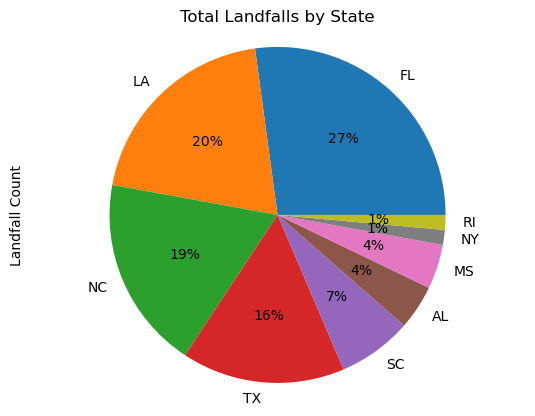

In [8]:
unique_storm_df = formatted_landfall_df.drop_duplicates(subset=['Storm Name','State'])
state_counts = unique_storm_df.value_counts("State")

landfall_pie = state_counts.plot.pie(y='Total Landfalls',autopct="%1.0f%%",title=('Total Landfalls by State'))
landfall_pie.set_ylabel('Landfall Count')
plt.axis("equal")

#Save the figure
plt.savefig('Graphs/state_pie.png')

plt.show()

-----------------------------------------------------------------
Mean HPI Change by County
    Year -1:    6.24
    Year of:    8.85
    Year +1:    10.72
    Year +2:    5.25
    Year +3:    0.47
-----------------------------------------------------------------
Mean HPI Change by State
    Year -1:    4.97
    Year of:    7.28
    Year +1:    7.93
    Year +2:    4.88
    Year +3:    2.19
-----------------------------------------------------------------
Mean HPI Change by Nation
    Year -1:    3.31
    Year of:    4.5
    Year +1:    4.86
    Year +2:    4.2
    Year +3:    3.34


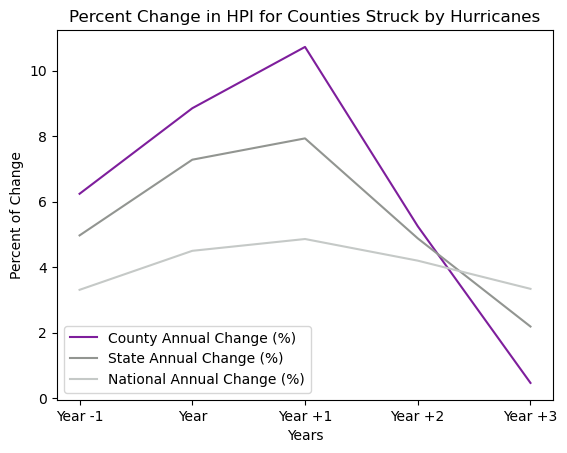

In [9]:
#Calculate mean annual HPI change for counties affect by hurricanes
prev_hpi_ac_mean = costliness_bea_hpi_df['Annual HPI Change (%) -1'].mean().round(2)
hpi_ac_mean = costliness_bea_hpi_df['Annual HPI Change (%)'].mean().round(2)
hpi_ac1_mean = costliness_bea_hpi_df['Annual HPI Change (%) +1'].mean().round(2)
hpi_ac2_mean = costliness_bea_hpi_df['Annual HPI Change (%) +2'].mean().round(2)
hpi_ac3_mean = costliness_bea_hpi_df['Annual HPI Change (%) +3'].mean().round(2)

#Calculate mean annual HPI change for the whole state
state_prev_hpi_ac_mean = costliness_bea_hpi_df['State HPI AC Mean -1'].mean().round(2)
state_hpi_ac_mean = costliness_bea_hpi_df['State HPI AC Mean'].mean().round(2)
state_hpi_ac1_mean = costliness_bea_hpi_df['State HPI AC Mean +1'].mean().round(2)
state_hpi_ac2_mean = costliness_bea_hpi_df['State HPI AC Mean +2'].mean().round(2)
state_hpi_ac3_mean = costliness_bea_hpi_df['State HPI AC Mean +3'].mean().round(2)

#Calculate mean annual HPI change for the whole nation
nat_prev_hpi_ac_mean = costliness_bea_hpi_df['National HPI AC Mean -1'].mean().round(2)
nat_hpi_ac_mean = costliness_bea_hpi_df['National HPI AC Mean'].mean().round(2)
nat_hpi_ac1_mean = costliness_bea_hpi_df['National HPI AC Mean +1'].mean().round(2)
nat_hpi_ac2_mean = costliness_bea_hpi_df['National HPI AC Mean +2'].mean().round(2)
nat_hpi_ac3_mean = costliness_bea_hpi_df['National HPI AC Mean +3'].mean().round(2)

#Print results
print('-----------------------------------------------------------------')
print('Mean HPI Change by County')
print(f'    Year -1:    {prev_hpi_ac_mean}')
print(f'    Year of:    {hpi_ac_mean}')
print(f'    Year +1:    {hpi_ac1_mean}')
print(f'    Year +2:    {hpi_ac2_mean}')
print(f'    Year +3:    {hpi_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean HPI Change by State')
print(f'    Year -1:    {state_prev_hpi_ac_mean}')
print(f'    Year of:    {state_hpi_ac_mean}')
print(f'    Year +1:    {state_hpi_ac1_mean}')
print(f'    Year +2:    {state_hpi_ac2_mean}')
print(f'    Year +3:    {state_hpi_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean HPI Change by Nation')
print(f'    Year -1:    {nat_prev_hpi_ac_mean}')
print(f'    Year of:    {nat_hpi_ac_mean}')
print(f'    Year +1:    {nat_hpi_ac1_mean}')
print(f'    Year +2:    {nat_hpi_ac2_mean}')
print(f'    Year +3:    {nat_hpi_ac3_mean}')

#Create a list for the lines in the graph below
lines = ['Year -1','Year','Year +1','Year +2','Year +3']
#Create lists to store the data created above
acs = [prev_hpi_ac_mean,hpi_ac_mean,hpi_ac1_mean,hpi_ac2_mean,hpi_ac3_mean]
state_acs = [state_prev_hpi_ac_mean,state_hpi_ac_mean,state_hpi_ac1_mean,state_hpi_ac2_mean,state_hpi_ac3_mean]
nat_acs = [nat_prev_hpi_ac_mean,nat_hpi_ac_mean,nat_hpi_ac1_mean,nat_hpi_ac2_mean,nat_hpi_ac3_mean]

#Plot a line chart for the data above
x_axis = np.arange(len(lines)) 
plt.plot(x_axis, acs, color='#7E1E9C',label = 'County Annual Change (%)') 
plt.plot(x_axis, state_acs, color='#929591',label = 'State Annual Change (%)') 
plt.plot(x_axis, nat_acs,color='#C5C9C7', label = 'National Annual Change (%)') 

#Format the line chart
plt.xticks(x_axis, lines) 
plt.xlabel("Years") 
plt.ylabel("Percent of Change") 
plt.title("Percent Change in HPI for Counties Struck by Hurricanes") 
plt.legend() 

#Save the figure
plt.savefig('Graphs/HPI_line.png')

#Display the chart
plt.show() 


-----------------------------------------------------------------
Difference between County and State: Mean HPI Change
    Year -1:    1.27
    Year of:    1.57
    Year +1:    2.79
    Year +2:    0.37
    Year +3:    -1.72
-----------------------------------------------------------------
Difference between County and Nation: Mean HPI Change
    Year -1:    2.93
    Year of:    4.35
    Year +1:    5.86
    Year +2:    1.05
    Year +3:    -2.87
-----------------------------------------------------------------


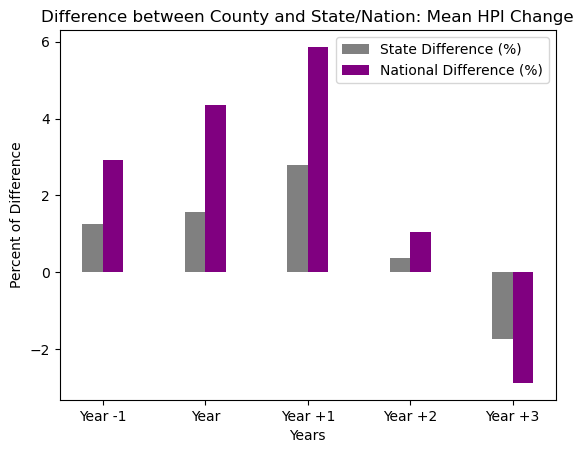

In [10]:
prev_state_hpi_dif = (prev_hpi_ac_mean-state_prev_hpi_ac_mean).round(2)
state_hpi_dif = (hpi_ac_mean-state_hpi_ac_mean).round(2)
state_hpi_dif1 = (hpi_ac1_mean-state_hpi_ac1_mean).round(2)
state_hpi_dif2 = (hpi_ac2_mean-state_hpi_ac2_mean).round(2)
state_hpi_dif3 = (hpi_ac3_mean-state_hpi_ac3_mean).round(2)

prev_nat_hpi_dif = (prev_hpi_ac_mean-nat_prev_hpi_ac_mean).round(2)
nat_hpi_dif = (hpi_ac_mean-nat_hpi_ac_mean).round(2)
nat_hpi_dif1 = (hpi_ac1_mean-nat_hpi_ac1_mean).round(2)
nat_hpi_dif2 = (hpi_ac2_mean-nat_hpi_ac2_mean).round(2)
nat_hpi_dif3 = (hpi_ac3_mean-nat_hpi_ac3_mean).round(2)

print('-----------------------------------------------------------------')
print('Difference between County and State: Mean HPI Change')
print(f'    Year -1:    {prev_state_hpi_dif}')
print(f'    Year of:    {state_hpi_dif}')
print(f'    Year +1:    {state_hpi_dif1}')
print(f'    Year +2:    {state_hpi_dif2}')
print(f'    Year +3:    {state_hpi_dif3}')
print('-----------------------------------------------------------------')
print('Difference between County and Nation: Mean HPI Change')
print(f'    Year -1:    {prev_nat_hpi_dif}')
print(f'    Year of:    {nat_hpi_dif}')
print(f'    Year +1:    {nat_hpi_dif1}')
print(f'    Year +2:    {nat_hpi_dif2}')
print(f'    Year +3:    {nat_hpi_dif3}')
print('-----------------------------------------------------------------')

bars = ['Year -1','Year','Year +1','Year +2','Year +3']
state_hpi_difs = [prev_state_hpi_dif,state_hpi_dif,state_hpi_dif1,state_hpi_dif2,state_hpi_dif3]
nat_hpi_difs = [prev_nat_hpi_dif,nat_hpi_dif,nat_hpi_dif1,nat_hpi_dif2,nat_hpi_dif3]

x_axis = np.arange(len(bars)) 
  
plt.bar(x_axis - 0.1, state_hpi_difs, 0.2, color='gray',label = 'State Difference (%)') 
plt.bar(x_axis + 0.1, nat_hpi_difs, 0.2, color='purple',label = 'National Difference (%)') 

plt.xticks(x_axis, bars) 
plt.xlabel("Years") 
plt.ylabel("Percent of Difference") 
plt.title("Difference between County and State/Nation: Mean HPI Change") 
plt.legend() 

#Save the figure
plt.savefig('Graphs/HPI_bar.png')

plt.show() 

-----------------------------------------------------------------
Mean Income Change by County
    Year -1:    5.9
    Year of:    7.74
    Year +1:    5.98
    Year +2:    7.58
    Year +3:    4.78
-----------------------------------------------------------------
Mean Income Change by State
    Year -1:    5.59
    Year of:    6.64
    Year +1:    5.54
    Year +2:    5.84
    Year +3:    5.44
-----------------------------------------------------------------
Mean Income Change by Nation
    Year -1:    4.98
    Year of:    5.21
    Year +1:    4.45
    Year +2:    5.33
    Year +3:    5.33


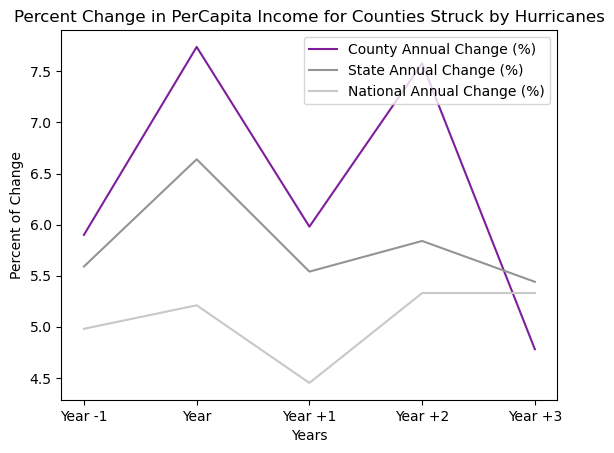

In [11]:
#Calculate mean annual HPI change for counties affect by hurricanes
prev_income_ac_mean = costliness_bea_hpi_df['Annual Income Change (%) -1'].mean().round(2)
income_ac_mean = costliness_bea_hpi_df['Annual Income Change (%)'].mean().round(2)
income_ac1_mean = costliness_bea_hpi_df['Annual Income Change (%) +1'].mean().round(2)
income_ac2_mean = costliness_bea_hpi_df['Annual Income Change (%) +2'].mean().round(2)
income_ac3_mean = costliness_bea_hpi_df['Annual Income Change (%) +3'].mean().round(2)

#Calculate mean annual HPI change for the whole state
state_prev_income_ac_mean = costliness_bea_hpi_df['State Income AC Mean -1'].mean().round(2)
state_income_ac_mean = costliness_bea_hpi_df['State Income AC Mean'].mean().round(2)
state_income_ac1_mean = costliness_bea_hpi_df['State Income AC Mean +1'].mean().round(2)
state_income_ac2_mean = costliness_bea_hpi_df['State Income AC Mean +2'].mean().round(2)
state_income_ac3_mean = costliness_bea_hpi_df['State Income AC Mean +3'].mean().round(2)

#Calculate mean annual HPI change for the whole nation
nat_prev_income_ac_mean = costliness_bea_hpi_df['National Income AC Mean -1'].mean().round(2)
nat_income_ac_mean = costliness_bea_hpi_df['National Income AC Mean'].mean().round(2)
nat_income_ac1_mean = costliness_bea_hpi_df['National Income AC Mean +1'].mean().round(2)
nat_income_ac2_mean = costliness_bea_hpi_df['National Income AC Mean +2'].mean().round(2)
nat_income_ac3_mean = costliness_bea_hpi_df['National Income AC Mean +3'].mean().round(2)

#Print results
print('-----------------------------------------------------------------')
print('Mean Income Change by County')
print(f'    Year -1:    {prev_income_ac_mean}')
print(f'    Year of:    {income_ac_mean}')
print(f'    Year +1:    {income_ac1_mean}')
print(f'    Year +2:    {income_ac2_mean}')
print(f'    Year +3:    {income_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Income Change by State')
print(f'    Year -1:    {state_prev_income_ac_mean}')
print(f'    Year of:    {state_income_ac_mean}')
print(f'    Year +1:    {state_income_ac1_mean}')
print(f'    Year +2:    {state_income_ac2_mean}')
print(f'    Year +3:    {state_income_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Income Change by Nation')
print(f'    Year -1:    {nat_prev_income_ac_mean}')
print(f'    Year of:    {nat_income_ac_mean}')
print(f'    Year +1:    {nat_income_ac1_mean}')
print(f'    Year +2:    {nat_income_ac2_mean}')
print(f'    Year +3:    {nat_income_ac3_mean}')

lines = ['Year -1','Year','Year +1','Year +2','Year +3']
acs = [prev_income_ac_mean,income_ac_mean,income_ac1_mean,income_ac2_mean,income_ac3_mean]
state_acs = [state_prev_income_ac_mean,state_income_ac_mean,state_income_ac1_mean,state_income_ac2_mean,state_income_ac3_mean]
nat_acs = [nat_prev_income_ac_mean,nat_income_ac_mean,nat_income_ac1_mean,nat_income_ac2_mean,nat_income_ac3_mean]

x_axis = np.arange(len(lines)) 
  
plt.plot(x_axis, acs, color='#7E1E9C',label = 'County Annual Change (%)') 
plt.plot(x_axis, state_acs,color='#929591', label = 'State Annual Change (%)') 
plt.plot(x_axis, nat_acs,color='#C5C9C7', label = 'National Annual Change (%)') 
  
plt.xticks(x_axis, lines) 
plt.xlabel("Years") 
plt.ylabel("Percent of Change") 
plt.title("Percent Change in PerCapita Income for Counties Struck by Hurricanes") 
plt.legend() 

#Save the figure
plt.savefig('Graphs/income_line.png')

plt.show() 

-----------------------------------------------------------------
Difference between County and State: Mean Income Change
    Year -1:    0.31
    Year of:    1.1
    Year +1:    0.44
    Year +2:    1.74
    Year +3:    -0.66
-----------------------------------------------------------------
Difference between County and Nation: Mean Income Change
    Year -1:    0.92
    Year of:    2.53
    Year +1:    1.53
    Year +2:    2.25
    Year +3:    -0.55
-----------------------------------------------------------------


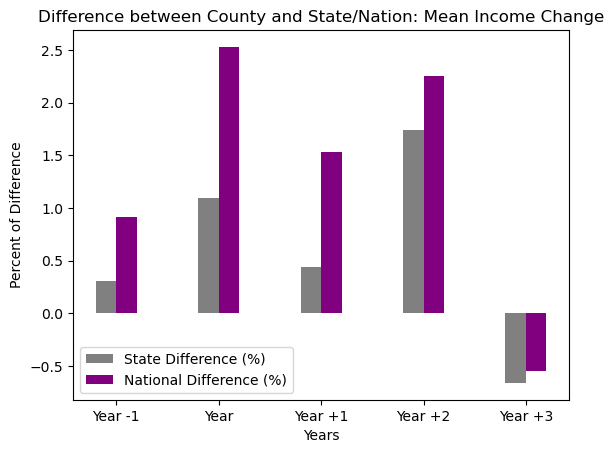

In [12]:
prev_state_income_dif = (prev_income_ac_mean-state_prev_income_ac_mean).round(2)
state_income_dif = (income_ac_mean-state_income_ac_mean).round(2)
state_income_dif1 = (income_ac1_mean-state_income_ac1_mean).round(2)
state_income_dif2 = (income_ac2_mean-state_income_ac2_mean).round(2)
state_income_dif3 = (income_ac3_mean-state_income_ac3_mean).round(2)

prev_nat_income_dif = (prev_income_ac_mean-nat_prev_income_ac_mean).round(2)
nat_income_dif = (income_ac_mean-nat_income_ac_mean).round(2)
nat_income_dif1 = (income_ac1_mean-nat_income_ac1_mean).round(2)
nat_income_dif2 = (income_ac2_mean-nat_income_ac2_mean).round(2)
nat_income_dif3 = (income_ac3_mean-nat_income_ac3_mean).round(2)

print('-----------------------------------------------------------------')
print('Difference between County and State: Mean Income Change')
print(f'    Year -1:    {prev_state_income_dif}')
print(f'    Year of:    {state_income_dif}')
print(f'    Year +1:    {state_income_dif1}')
print(f'    Year +2:    {state_income_dif2}')
print(f'    Year +3:    {state_income_dif3}')
print('-----------------------------------------------------------------')
print('Difference between County and Nation: Mean Income Change')
print(f'    Year -1:    {prev_nat_income_dif}')
print(f'    Year of:    {nat_income_dif}')
print(f'    Year +1:    {nat_income_dif1}')
print(f'    Year +2:    {nat_income_dif2}')
print(f'    Year +3:    {nat_income_dif3}')
print('-----------------------------------------------------------------')

bars = ['Year -1','Year','Year +1','Year +2','Year +3']
state_income_difs = [prev_state_income_dif,state_income_dif,state_income_dif1,state_income_dif2,state_income_dif3]
nat_income_difs = [prev_nat_income_dif,nat_income_dif,nat_income_dif1,nat_income_dif2,nat_income_dif3]

x_axis = np.arange(len(bars)) 
  
plt.bar(x_axis - 0.1, state_income_difs, 0.2,color='gray', label = 'State Difference (%)') 
plt.bar(x_axis + 0.1, nat_income_difs, 0.2,color='purple', label = 'National Difference (%)') 

plt.xticks(x_axis, bars) 
plt.xlabel("Years") 
plt.ylabel("Percent of Difference") 
plt.title("Difference between County and State/Nation: Mean Income Change") 
plt.legend() 

#Save the figure
plt.savefig('Graphs/income_bar.png')

plt.show() 

-----------------------------------------------------------------
Mean Jobs Change by County
    Year -1:    2.02
    Year of:    1.94
    Year +1:    2.65
    Year +2:    2.57
    Year +3:    0.92
-----------------------------------------------------------------
Mean Jobs Change by State
    Year -1:    2.16
    Year of:    2.42
    Year +1:    2.45
    Year +2:    1.85
    Year +3:    0.97
-----------------------------------------------------------------
Mean Jobs Change by Nation
    Year -1:    1.19
    Year of:    1.36
    Year +1:    1.3
    Year +2:    1.11
    Year +3:    0.82


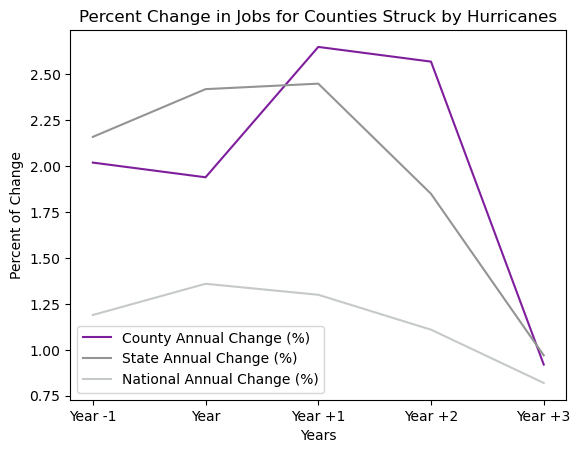

In [13]:
#Calculate mean annual HPI change for counties affect by hurricanes
prev_jobs_ac_mean = costliness_bea_hpi_df['Annual Jobs Change (%) -1'].mean().round(2)
jobs_ac_mean = costliness_bea_hpi_df['Annual Jobs Change (%)'].mean().round(2)
jobs_ac1_mean = costliness_bea_hpi_df['Annual Jobs Change (%) +1'].mean().round(2)
jobs_ac2_mean = costliness_bea_hpi_df['Annual Jobs Change (%) +2'].mean().round(2)
jobs_ac3_mean = costliness_bea_hpi_df['Annual Jobs Change (%) +3'].mean().round(2)

#Calculate mean annual HPI change for the whole state
state_prev_jobs_ac_mean = costliness_bea_hpi_df['State Jobs AC Mean -1'].mean().round(2)
state_jobs_ac_mean = costliness_bea_hpi_df['State Jobs AC Mean'].mean().round(2)
state_jobs_ac1_mean = costliness_bea_hpi_df['State Jobs AC Mean +1'].mean().round(2)
state_jobs_ac2_mean = costliness_bea_hpi_df['State Jobs AC Mean +2'].mean().round(2)
state_jobs_ac3_mean = costliness_bea_hpi_df['State Jobs AC Mean +3'].mean().round(2)

#Calculate mean annual HPI change for the whole nation
nat_prev_jobs_ac_mean = costliness_bea_hpi_df['National Jobs AC Mean -1'].mean().round(2)
nat_jobs_ac_mean = costliness_bea_hpi_df['National Jobs AC Mean'].mean().round(2)
nat_jobs_ac1_mean = costliness_bea_hpi_df['National Jobs AC Mean +1'].mean().round(2)
nat_jobs_ac2_mean = costliness_bea_hpi_df['National Jobs AC Mean +2'].mean().round(2)
nat_jobs_ac3_mean = costliness_bea_hpi_df['National Jobs AC Mean +3'].mean().round(2)

#Print results
print('-----------------------------------------------------------------')
print('Mean Jobs Change by County')
print(f'    Year -1:    {prev_jobs_ac_mean}')
print(f'    Year of:    {jobs_ac_mean}')
print(f'    Year +1:    {jobs_ac1_mean}')
print(f'    Year +2:    {jobs_ac2_mean}')
print(f'    Year +3:    {jobs_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Jobs Change by State')
print(f'    Year -1:    {state_prev_jobs_ac_mean}')
print(f'    Year of:    {state_jobs_ac_mean}')
print(f'    Year +1:    {state_jobs_ac1_mean}')
print(f'    Year +2:    {state_jobs_ac2_mean}')
print(f'    Year +3:    {state_jobs_ac3_mean}')
print('-----------------------------------------------------------------')
print('Mean Jobs Change by Nation')
print(f'    Year -1:    {nat_prev_jobs_ac_mean}')
print(f'    Year of:    {nat_jobs_ac_mean}')
print(f'    Year +1:    {nat_jobs_ac1_mean}')
print(f'    Year +2:    {nat_jobs_ac2_mean}')
print(f'    Year +3:    {nat_jobs_ac3_mean}')

lines = ['Year -1','Year','Year +1','Year +2','Year +3']
acs = [prev_jobs_ac_mean,jobs_ac_mean,jobs_ac1_mean,jobs_ac2_mean,jobs_ac3_mean]
state_acs = [state_prev_jobs_ac_mean,state_jobs_ac_mean,state_jobs_ac1_mean,state_jobs_ac2_mean,state_jobs_ac3_mean]
nat_acs = [nat_prev_jobs_ac_mean,nat_jobs_ac_mean,nat_jobs_ac1_mean,nat_jobs_ac2_mean,nat_jobs_ac3_mean]

x_axis = np.arange(len(lines)) 
  
plt.plot(x_axis, acs, color='#7E1E9C',label = 'County Annual Change (%)') 
plt.plot(x_axis, state_acs,color='#929591',label = 'State Annual Change (%)') 
plt.plot(x_axis, nat_acs,color='#C5C9C7',label = 'National Annual Change (%)') 
  
plt.xticks(x_axis, lines) 
plt.xlabel("Years") 
plt.ylabel("Percent of Change") 
plt.title("Percent Change in Jobs for Counties Struck by Hurricanes") 
plt.legend() 

#Save the figure
plt.savefig('Graphs/jobs_line.png')

plt.show() 

-----------------------------------------------------------------
Difference between County and State: Mean Jobs Change
    Year -1:    -0.14
    Year of:    -0.48
    Year +1:    0.2
    Year +2:    0.72
    Year +3:    -0.05
-----------------------------------------------------------------
Difference between County and Nation: Mean Jobs Change
    Year -1:    0.83
    Year of:    0.58
    Year +1:    1.35
    Year +2:    1.46
    Year +3:    0.1
-----------------------------------------------------------------


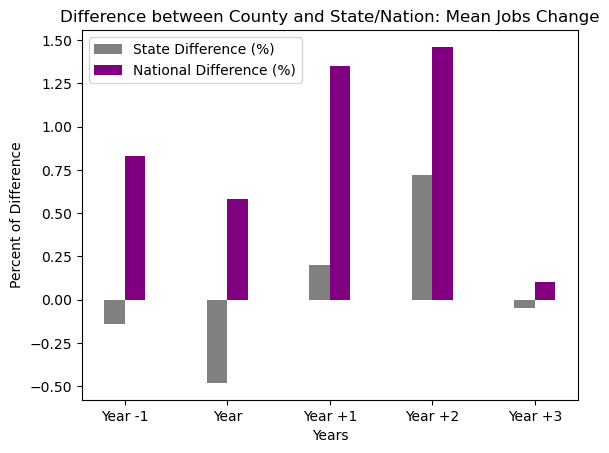

In [14]:
prev_state_jobs_dif = (prev_jobs_ac_mean-state_prev_jobs_ac_mean).round(2)
state_jobs_dif = (jobs_ac_mean-state_jobs_ac_mean).round(2)
state_jobs_dif1 = (jobs_ac1_mean-state_jobs_ac1_mean).round(2)
state_jobs_dif2 = (jobs_ac2_mean-state_jobs_ac2_mean).round(2)
state_jobs_dif3 = (jobs_ac3_mean-state_jobs_ac3_mean).round(2)

prev_nat_jobs_dif = (prev_jobs_ac_mean-nat_prev_jobs_ac_mean).round(2)
nat_jobs_dif = (jobs_ac_mean-nat_jobs_ac_mean).round(2)
nat_jobs_dif1 = (jobs_ac1_mean-nat_jobs_ac1_mean).round(2)
nat_jobs_dif2 = (jobs_ac2_mean-nat_jobs_ac2_mean).round(2)
nat_jobs_dif3 = (jobs_ac3_mean-nat_jobs_ac3_mean).round(2)

print('-----------------------------------------------------------------')
print('Difference between County and State: Mean Jobs Change')
print(f'    Year -1:    {prev_state_jobs_dif}')
print(f'    Year of:    {state_jobs_dif}')
print(f'    Year +1:    {state_jobs_dif1}')
print(f'    Year +2:    {state_jobs_dif2}')
print(f'    Year +3:    {state_jobs_dif3}')
print('-----------------------------------------------------------------')
print('Difference between County and Nation: Mean Jobs Change')
print(f'    Year -1:    {prev_nat_jobs_dif}')
print(f'    Year of:    {nat_jobs_dif}')
print(f'    Year +1:    {nat_jobs_dif1}')
print(f'    Year +2:    {nat_jobs_dif2}')
print(f'    Year +3:    {nat_jobs_dif3}')
print('-----------------------------------------------------------------')

bars = ['Year -1','Year','Year +1','Year +2','Year +3']
state_jobs_difs = [prev_state_jobs_dif,state_jobs_dif,state_jobs_dif1,state_jobs_dif2,state_jobs_dif3]
nat_jobs_difs = [prev_nat_jobs_dif,nat_jobs_dif,nat_jobs_dif1,nat_jobs_dif2,nat_jobs_dif3]

x_axis = np.arange(len(bars)) 
  
plt.bar(x_axis - 0.1, state_jobs_difs, 0.2,color='gray', label = 'State Difference (%)') 
plt.bar(x_axis + 0.1, nat_jobs_difs,0.2, color='purple',label = 'National Difference (%)') 

plt.xticks(x_axis, bars) 
plt.xlabel("Years") 
plt.ylabel("Percent of Difference") 
plt.title("Difference between County and State/Nation: Mean Jobs Change") 
plt.legend() 

#Save the figure
plt.savefig('Graphs/jobs_bar.png')

plt.show() 